# Atividade 2 - Visão Computacional

In [11]:
import sys
import cv2
import matplotlib.pyplot as plt
import fotogrametria

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(fotogrametria) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(fotogrametria)

O entregável de toda esta atividade vai ser um código-fonte em *Python*. 

Vocês *devem* fazer vídeos demonstrando o resultado e a postar (pode ser privadamente) no YouTube.  Para quem usar Linux o atalho para gravar é Ctrl + Alt + Shift + R


Você pode entregar enviando o código para o Github e postando o vídeo *ou* mostrando ao vivo aos professores

**Não programe no Jupyter** - use um programa Python

**Link para o vídeo**: [https://youtu.be/p3ezNo-mWFI](https://youtu.be/p3ezNo-mWFI)

Você deve ter uma folha com o padrão anexo. 
*Dica:* Se não tiver, é possível fazer também com um tablet ou *smartphone*
 
<img src="notebook_aux/folha_atividade.png" width=300>

## Parte 1 - calibração

<img src="./notebook_aux/pinhole.png" width=60%>

Ouça a explicação do professor sobre o modelo de câmera *pinhole*  e desenhe a medida $f$ que separa o plano focal da pupila da câmera

Modifique a função `encontrar_foco` do arquivo [fotogrametria.py](fotogrametria.py) para calcular o foco, teste sua função com a celula abaixo

In [12]:
f = fotogrametria.encontrar_foco(80,12.70,100)

print(f)
# Saida Esperada:
# 629.9212598425197

629.9212598425197


## Parte 2
### Segmentar os Circulos
Modifique a função `segmenta_circulo_ciano` e `segmenta_circulo_magenta` do arquivo [fotogrametria.py](fotogrametria.py) para segmentar os circulos cianos e magenta

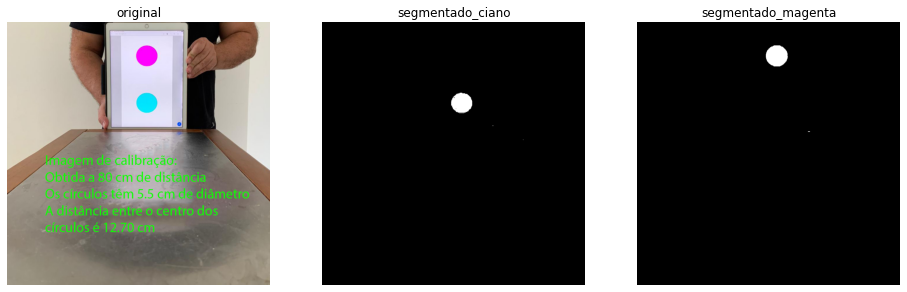

In [13]:
img = cv2.imread("img/calib01.jpg")
# img = cv2.imread("img/teste_andre.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

segmentado_ciano = fotogrametria.segmenta_circulo_ciano(hsv)
segmentado_magenta = fotogrametria.segmenta_circulo_magenta(hsv)

f, ax = plt.subplots(1, 3, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(segmentado_ciano, cmap="gray")
ax[2].imshow(segmentado_magenta, cmap="gray")

ax[0].set_title('original')
ax[1].set_title('segmentado_ciano')
ax[2].set_title('segmentado_magenta')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

plt.show()

# Saida Esperada:
# Uma imagem com o circulo ciano em branco e outro com o magenta

## Parte 3
### Encontrar os maior contorno para cada um dos Circulos
Modifique a função `encontrar_maior_contorno` do arquivo [fotogrametria.py](fotogrametria.py) para calcular apenas o maior contorno do circulo ciano e o maior contorno do circulo magenta.

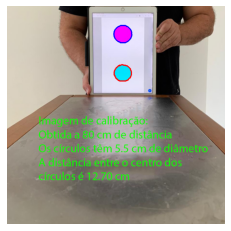

In [14]:
# Desenhar os Contornos
    # Ciano
ccontorno_ciano = fotogrametria.encontrar_maior_contorno(segmentado_ciano)

contornos_img = img.copy()
if ccontorno_ciano is not None:
    cv2.drawContours(contornos_img, [ccontorno_ciano], -1, [0, 0, 255], 3)

    # Magenta
contorno_magenta = fotogrametria.encontrar_maior_contorno(segmentado_magenta)

if contorno_magenta is not None:
    cv2.drawContours(contornos_img, [contorno_magenta], -1, [255, 0, 0], 3)

plt.axis('off')
plt.imshow(cv2.cvtColor(contornos_img, cv2.COLOR_BGR2RGB))

# Saida Esperada:
# Uma imagem com o um contorno desenhado em ambos os circulos (Circulo vemermelho no ciano e azul no magenta)


## Parte 4

### Com os contornos, calcular o centro dos circulos
Modifique a função `encontrar_centro_contorno` do arquivo [fotogrametria.py](fotogrametria.py) para calcular a posição, em pixel, do centro de cada circulo.

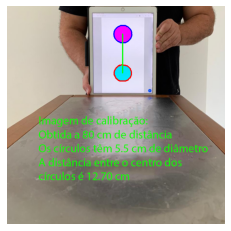

In [15]:
# Encontrar Centro dos contornos

if ccontorno_ciano is not None and contorno_magenta is not None:
    centro_ciano = fotogrametria.encontrar_centro_contorno(ccontorno_ciano)
    centro_magenta = fotogrametria.encontrar_centro_contorno(contorno_magenta)

    cv2.line(contornos_img, centro_ciano, centro_magenta, (0, 255, 0), thickness=3, lineType=8)

plt.axis('off')
plt.imshow(cv2.cvtColor(contornos_img, cv2.COLOR_BGR2RGB))

# Saida Esperada:
# Uma imagem uma linha no conectando o centros dos circulos

## Parte 5

### Calcular a distancia entre os circulos
Modifique a função `calcular_h` do arquivo [fotogrametria.py](fotogrametria.py) para calcular o valor da distancia vertical entre os circulos e com isso, calcular o foco da camera.

In [16]:
try:
    h = fotogrametria.calcular_h(centro_ciano, centro_magenta)

    print('Distancia entre os circulos = %s'%h)
    f = fotogrametria.encontrar_foco(80,12.70,h)

    print('Distancia focal = %s'%f)

except:
    pass

# Saida Esperada:
# Distancia entre os circulos = 161
# Distancia focal = 1014.1732283464568

Distancia entre os circulos = 161.0
Distancia focal = 1014.1732283464568


## Parte 6

### Calcular até a imagem
Agora, utilizando o foco encontrado e as funções para calcular a distancia dos circulos, modifique as funções `calcular_distancia_entre_circulos` e `encontrar_distancia` do arquivo [fotogrametria.py](fotogrametria.py) para calcular a distancia entre os circulos, e com o foco, a distancia, em cm, até a imagem.

In [17]:
img_test = cv2.imread("img/test01.jpg")

h, centro_ciano, centro_magenta, contornos_img = fotogrametria.calcular_distancia_entre_circulos(img_test)
d = fotogrametria.encontrar_distancia(f,12.70,h)

print('Distancia ate a imagem = %s'%d)

# Saida Esperada:
# Distancia ate a imagem = 40.124610591900314

Distancia ate a imagem = 40.124415891157206


## Parte 7

### Calcular angulo
Modifique a função `calcular_angulo_com_horizontal_da_imagem` do arquivo [fotogrametria.py](fotogrametria.py) para calcular o angulo dos circulos com relação a horizontal da imagem

In [18]:
img_test = cv2.imread("img/angulo01.jpg")

h, centro_ciano, centro_magenta, contornos_img = fotogrametria.calcular_distancia_entre_circulos(img_test)
d = fotogrametria.encontrar_distancia(f,12.70,h)

angulo = fotogrametria.calcular_angulo_com_horizontal_da_imagem(centro_ciano, centro_magenta)

print('Angulo deu %s graus'%angulo)

# Saida Esperada:
# angulo01.jpg: Angulo de 90.0 graos
# angulo02.jpg: Angulo de 141.9836231u755637 graus
# angulo03.jpg: Angulo de 178.929175u4521327 graus
# angulo04.jpg: Angulo de 28.7246296098617 graus

Angulo deu 90.17849094755361 graus


## Parte 8

### Repetir para um stream de video
Agora, modifique a função `calcular_angulo_e_distancia_na_image_da_webcam` e `desenhar_na_image_da_webcam` do arquivo [webcam.py](webcam.py) e repita todos os passos anteriores em um stream de video, desenhando os contornos na saida e escrevendo a distancia até a camera e o angulo em um canto da imagem.